# Pandas Intro

__Pandas__ is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

## Topics:
## Creating, reading, and writing reference

__First Step__:
Reading the data out of a file, and we'll look at exercises on creating pandas Series and DataFrame objects.
__You can check the doc here__ [link](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

First, we import our module

In [2]:
# import the module first
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Creating Data:
In this example, the "0, No" entry has the value of 131. The "0, Yes" entry has a value of 50, and so on.

__DataFrame__ :
entries are not limited to integers, and __it is similar to dictionary__. For instance, here's a DataFrame whose values are str strings:

In [3]:
data = pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})
print(data)

   Yes   No
0   50  131
1   21    2


In [4]:
data = pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']})
print(data)

             Bob           Sue
0    I liked it.  Pretty good.
1  It was awful.        Bland.


You can use index = ['name of the rows'] to define your index
__Example__:

In [5]:
print(pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 
              'Sue': ['Pretty good.', 'Bland.']},
             index=['Product A', 'Product B']))

                     Bob           Sue
Product A    I liked it.  Pretty good.
Product B  It was awful.        Bland.


__Series__:
Compared with __DataFrame__, __Series__ is more like a list.
__Series__ is, in essence, a single column of a DataFrame

In [6]:
# Basic Series
print(pd.Series([1, 2, 3, 4, 5]))
print('-------------------------')
# Name your Series a name and give them index names.
print('Series with named index:')
pd.Series([30, 35, 40], 
                index=['2015 Sales', '2016 Sales', '2017 Sales'], 
                name='Product A')

0    1
1    2
2    3
3    4
4    5
dtype: int64
-------------------------
Series with named index:


2015 Sales    30
2016 Sales    35
2017 Sales    40
Name: Product A, dtype: int64

## 2. Reading common file formats
In real life, we won't actually always be creating our own data by hand, we'll be working with data that already exists.
In most cases, we will deal with __csv file__ (similar as excel).

Format will be similar to the following:
A, B, C,
30,21,9,
35,34,1,
41,11,11

So a CSV file is a table of values separated by commas. Hence the name: "comma-seperated values", or CSV.

__Fortunately__, we can use pandas to read csv files.

In [7]:
# We can use pd read_csv method to read csv files
student_info = pd.read_csv("/home/weikunma/Desktop/jupyter/MyClass/Datasets/uk-500.csv")

# You can use head() method to read the first n data rows
student_info.head(5)


,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
0,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk
1,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
2,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk
3,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk
4,Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk


__However__, we have seen a lot of columns' datasets here.

We can use shape() method to first determine the dataset structure.

Sometimes we don't want that much columns(e.g city, county, phone1, etc). Therefore, we can specify the columns you want to see

In [12]:
# Example: see the shape of the dataset
print("Below means 500 rows,", "11 Columns")
print(student_info.shape)


# Example: only want first_name, company_name, and address
# Use list to define the columns you want to see
student_info[["first_name", "last_name"]].head(5)

Below means 500 rows, 11 Columns
(500, 11)


,first_name,last_name
0,Aleshia,Tomkiewicz
1,Evan,Zigomalas
2,France,Andrade
3,Ulysses,Mcwalters
4,Tyisha,Veness


__See the index__ in front of the datasets. Sometimes we want to use some of the data as index, so we can use the following methods to set the index we want

data.set_index("first_name", inplace= True)
data.head()

In [13]:
# Example: Set index with address
student_grade = pd.read_csv("/home/weikunma/Desktop/jupyter/MyClass/Datasets/abc.csv")
# print(student_grade.head(5))
student_grade.set_index("maths", inplace = True)
student_grade.head()

,student,language,science,history
maths,,,,
34,kumar,90,56,34
32,kevin,10,34,67
12,sammy,90,23,32
90,janice,20,67,45
45,peter,30,56,65


__You can see the sorted data__ by using __sort_values()__ method to sort the data with some of the columns.

In [14]:
data_sorted = pd.read_csv("/home/weikunma/Desktop/jupyter/MyClass/Datasets/abc.csv")
data_sorted = student_grade.sort_values(["maths"])
data_sorted.head()

,student,language,science,history
maths,,,,
12,sammy,90,23,32
32,kevin,10,34,67
34,kumar,90,56,34
45,peter,30,56,65
45,prem,90,45,34


__Now you can make some simple plot now__
First specify the columns you want for ploting the relationship's plot.

Then you can just plot it by using following methods

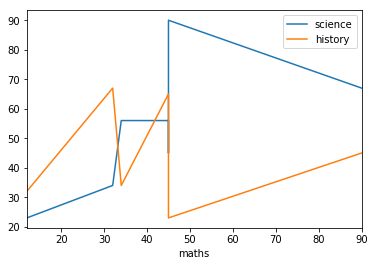

In [15]:
# We only want to find out the relationship between maths
# and science && maths and history
data_sorted[['science', 'history']].plot()

# But you need to put these two lines 
# import matplotlib.pyplot as plt
# %pylab inline
plt.show()

From the chart above, we can see that the relationships between Maths grade and History grade.

## 3. Writing common file formats
So, after we process the file, how do we put the data back to the files?
we can use:
data.to_csv("my_new_data.csv")

In [16]:
# Example:
data_sorted.to_csv("datasorted.csv")
# Go check the directory -->

__We have a Cheat Sheet__
![title](img/cheatSheet.png)